In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [2]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

print(class_names_label)

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

{'mountain': 0, 'street': 1, 'glacier': 2, 'buildings': 3, 'sea': 4, 'forest': 5}


In [3]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 06C6-74B6

 Directory of C:\Users\madhav.kumar\Documents\AI-ML-DS\Image Classification

18-12-2023  11.46 AM    <DIR>          .
18-12-2023  11.46 AM    <DIR>          ..
14-12-2023  12.13 PM    <DIR>          .ipynb_checkpoints
04-12-2023  12.54 PM       363,152,213 archive (2).zip
05-12-2023  11.53 AM                72 Exploratory Data Analysis(EDA).ipynb
05-12-2023  11.52 AM           389,834 image-classification-using-cnn-94-accuracy.ipynb
15-12-2023  02.52 PM         1,629,851 image_classifficatin_car_insurance.ipynb
18-12-2023  11.46 AM         1,731,119 image_classification_intel_data.ipynb
13-12-2023  03.51 PM    <DIR>          intel_data
22-11-2023  12.11 PM           134,325 kbs.ipynb
13-12-2023  03.52 PM    <DIR>          Ripik_AI
03-12-2023  04.19 PM            35,616 sample_submission-3.csv
               7 File(s)    367,073,030 bytes
               5 Dir(s)  311,683,911,680 bytes free


In [4]:
for folder in os.listdir('intel_data/seg_train/seg_train'):
    print(folder)

buildings
forest
glacier
mountain
sea
street


In [5]:
# dataset = 'intel_data/seg_train/seg_train'
# for folder in os.listdir(dataset):
#     print(folder)
#     for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                    
#                     # Get the path name of the image
#         img_path = os.path.join(os.path.join(dataset, folder), file)
#         print(img_path)

img_path = 'intel_data/seg_train/seg_train/buildings/0.jpg'

# Open and resize the img
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, IMAGE_SIZE) 
print(image)

[[[247 247 245]
  [247 247 245]
  [248 248 246]
  ...
  [248 248 248]
  [247 247 245]
  [247 247 245]]

 [[246 246 244]
  [247 247 245]
  [247 247 245]
  ...
  [248 248 248]
  [247 247 245]
  [247 247 245]]

 [[246 246 244]
  [246 246 244]
  [247 247 245]
  ...
  [248 248 248]
  [247 247 245]
  [247 247 245]]

 ...

 [[ 47  46  44]
  [ 62  61  59]
  [ 49  48  46]
  ...
  [ 51  46  43]
  [ 45  40  37]
  [ 94  89  86]]

 [[ 77  76  74]
  [ 47  46  44]
  [ 43  42  40]
  ...
  [ 22  17  14]
  [ 55  50  47]
  [ 39  34  31]]

 [[ 59  58  56]
  [ 55  54  52]
  [ 60  59  57]
  ...
  [ 31  26  23]
  [ 51  46  43]
  [ 63  58  55]]]


In [6]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['intel_data/seg_train/seg_train', 'intel_data/seg_test/seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [7]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading intel_data/seg_train/seg_train


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2382/2382 [00:03<00:00, 597.78it/s]


Loading intel_data/seg_test/seg_test


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 501/501 [00:00<00:00, 536.06it/s]


In [8]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [9]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150)


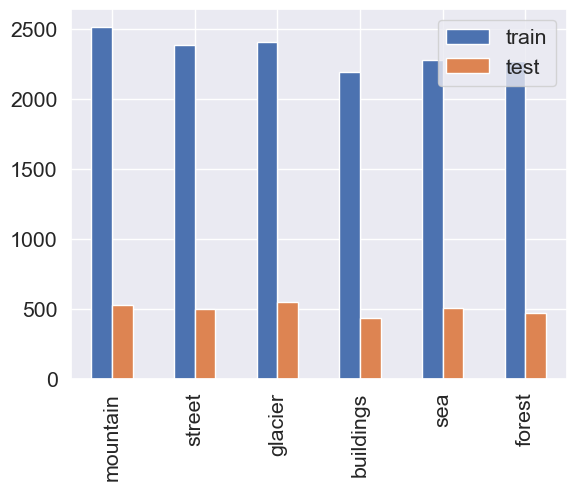

In [10]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

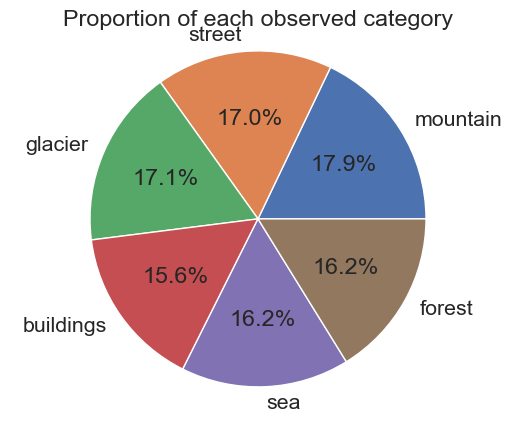

In [11]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [12]:
#scale the data
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [13]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

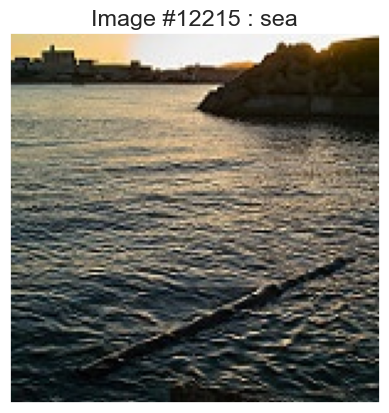

In [14]:
display_random_image(class_names, train_images, train_labels)

In [15]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

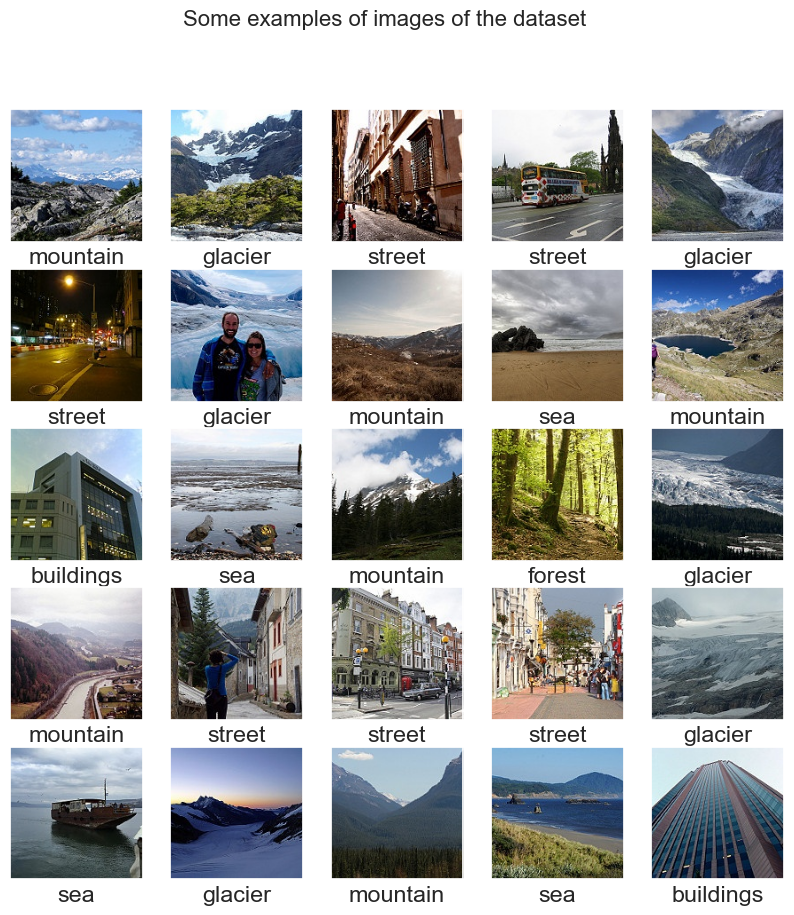

In [16]:
display_examples(class_names, train_images, train_labels)

- Conv2D: \(32 filters of size 3 by 3\) The features will be "extracted" from the image
- MaxPooling2D: The images get half sized
- Flatten: Transforms the format of the images from a 2d-array to a 1d-array of 150 150 3 pixel values
- Relu : given a value x, returns max(x, 0).
- Softmax: 6 neurons, probability that the image belongs to one of the classes.

In [18]:
model = tf.keras.Sequential([
    # First convolutional layer with 32 filters, each of size (3, 3), and ReLU activation function
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    # Max pooling layer with a pool size of (2, 2)
    tf.keras.layers.MaxPooling2D(2,2),
    # Second convolutional layer with 32 filters, each of size (3, 3), and ReLU activation function
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    # Max pooling layer with a pool size of (2, 2)
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten layer to convert the 2D output to a 1D vector
    tf.keras.layers.Flatten(),
     # Fully connected dense layer with 128 neurons and ReLU activation function
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
     # Output layer with 6 neurons (classification problem) and softmax activation function
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

- Optimizer: adam = RMSProp + Momentum.
- Momentum = takes into account past gradient to have a better update.
- RMSProp = exponentially weighted average of the squares of past gradients.
- Loss function: sparse categorical crossentropy for classification, each images belongs to one class only

In [19]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20


88/88 [==============================] - 43s 432ms/step - loss: 1.1405 - accuracy: 0.5736 - val_loss: 0.8959 - val_accuracy: 0.6576
Epoch 2/20
88/88 [==============================] - 34s 383ms/step - loss: 0.7648 - accuracy: 0.7194 - val_loss: 0.8030 - val_accuracy: 0.6993
Epoch 3/20
88/88 [==============================] - 33s 376ms/step - loss: 0.5711 - accuracy: 0.7942 - val_loss: 0.7590 - val_accuracy: 0.6993
Epoch 4/20
88/88 [==============================] - 34s 382ms/step - loss: 0.4219 - accuracy: 0.8514 - val_loss: 0.7347 - val_accuracy: 0.7528
Epoch 5/20
88/88 [==============================] - 34s 392ms/step - loss: 0.2991 - accuracy: 0.8993 - val_loss: 0.8360 - val_accuracy: 0.7264
Epoch 6/20
88/88 [==============================] - 36s 409ms/step - loss: 0.1984 - accuracy: 0.9361 - val_loss: 0.7907 - val_accuracy: 0.7634
Epoch 7/20
88/88 [==============================] - 41s 465ms/step - loss: 0.1564 - accuracy: 0.9518 - val_loss: 0.9026 - val_accuracy: 0.75

In [25]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

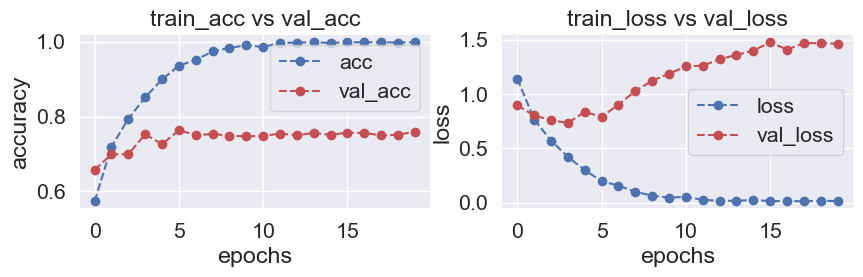

In [27]:
plot_accuracy_loss(history)

In [28]:
test_loss = model.evaluate(test_images, test_labels)

94/94 [==============================] - 3s 29ms/step - loss: 1.4171 - accuracy: 0.7537


94/94 [==============================] - 3s 29ms/step


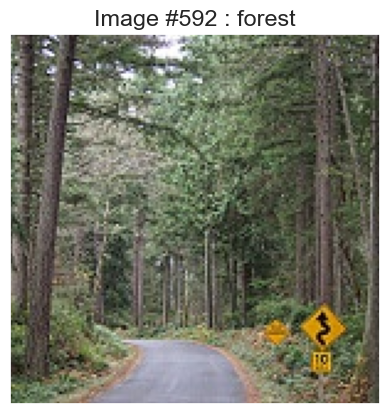

In [31]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [32]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

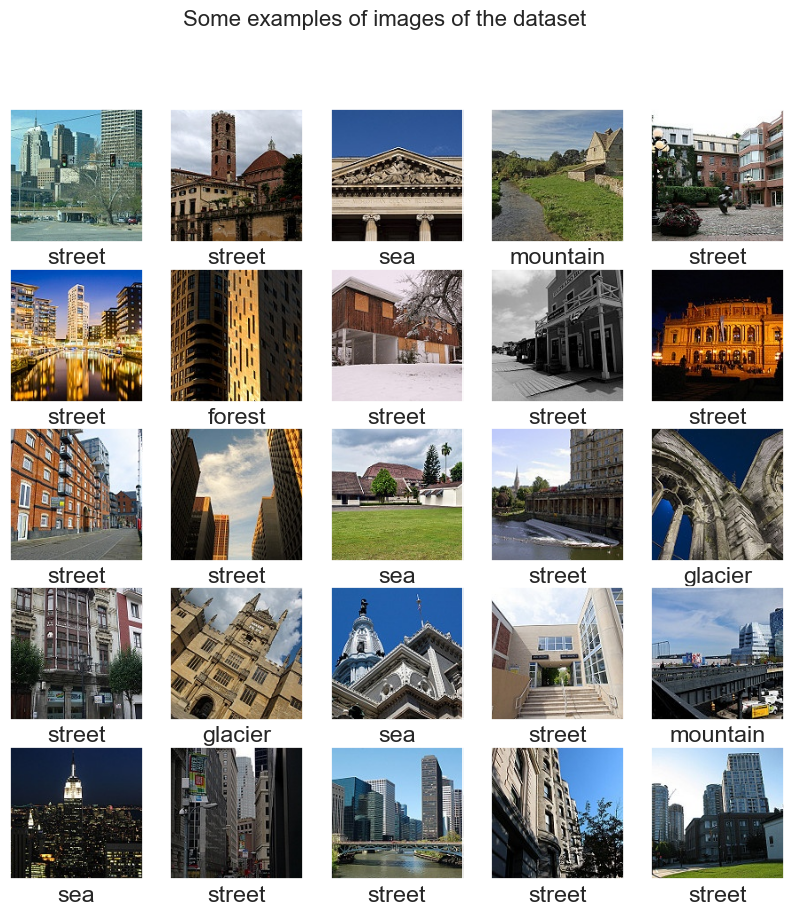

In [33]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

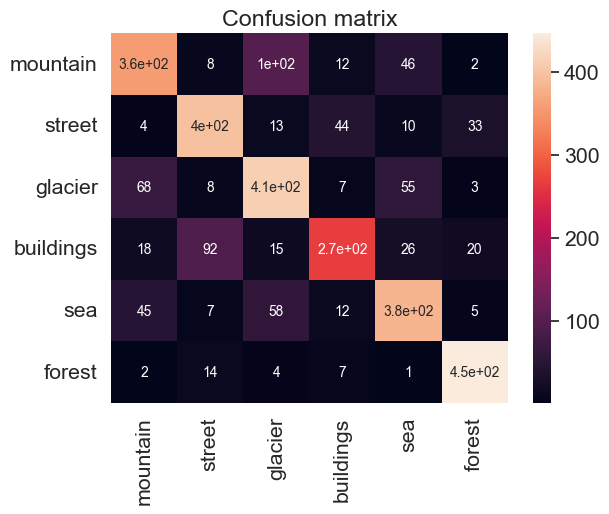

In [34]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()